# Машинное обучение (семинары)

### Урок 3. Классификация на практике

#### Домашние задание:

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

Пояснения к признакам набора данных:

• AGREEMENT_RK — уникальный идентификатор объекта в выборке;

• TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);

• AGE — возраст клиента;

• SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);

• SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);

• GENDER — пол клиента (1 — мужчина, 0 — женщина);

• CHILD_TOTAL — количество детей клиента;

• DEPENDANTS — количество иждивенцев клиента;

• PERSONAL_INCOME — личный доход клиента (в рублях);

• LOAN_NUM_TOTAL — количество ссуд клиента;

• LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Загрузка данных из файла
df = pd.read_csv('ClientsData.csv')

In [3]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Из общей информации следует:

Всего 11 колонок, DataFrame содержит 15223 записи, от 0 до 15222

Нулевые значения отсуствуют

Пропущеные значения отсуствуют

Колонка: PERSONAL_INCOME является объектом float64 остальные int64

In [5]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15223.0,40.406096,11.601068,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,15223.0,0.909610,0.286748,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,15223.0,0.134468,0.341165,0.0,0.0,0.0,0.0,1.0
GENDER,15223.0,0.654536,0.475535,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,15223.0,1.099389,0.995411,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,15223.0,0.645208,0.812252,0.0,0.0,0.0,1.0,7.0
PERSONAL_INCOME,15223.0,13853.836323,9015.467617,24.0,8000.0,12000.0,17000.0,250000.0
LOAN_NUM_TOTAL,15223.0,1.387769,0.793566,1.0,1.0,1.0,2.0,11.0
LOAN_NUM_CLOSED,15223.0,0.751889,0.988499,0.0,0.0,0.0,1.0,11.0
LOAN_DLQ_NUM,15223.0,0.195362,0.685022,0.0,0.0,0.0,0.0,13.0


In [6]:
# Проверка на нулевые значения
df.isnull().sum()

AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
LOAN_DLQ_NUM         0
TARGET               0
dtype: int64

In [7]:
# Проверка на NaN значения
df.isnull().any().any()

False

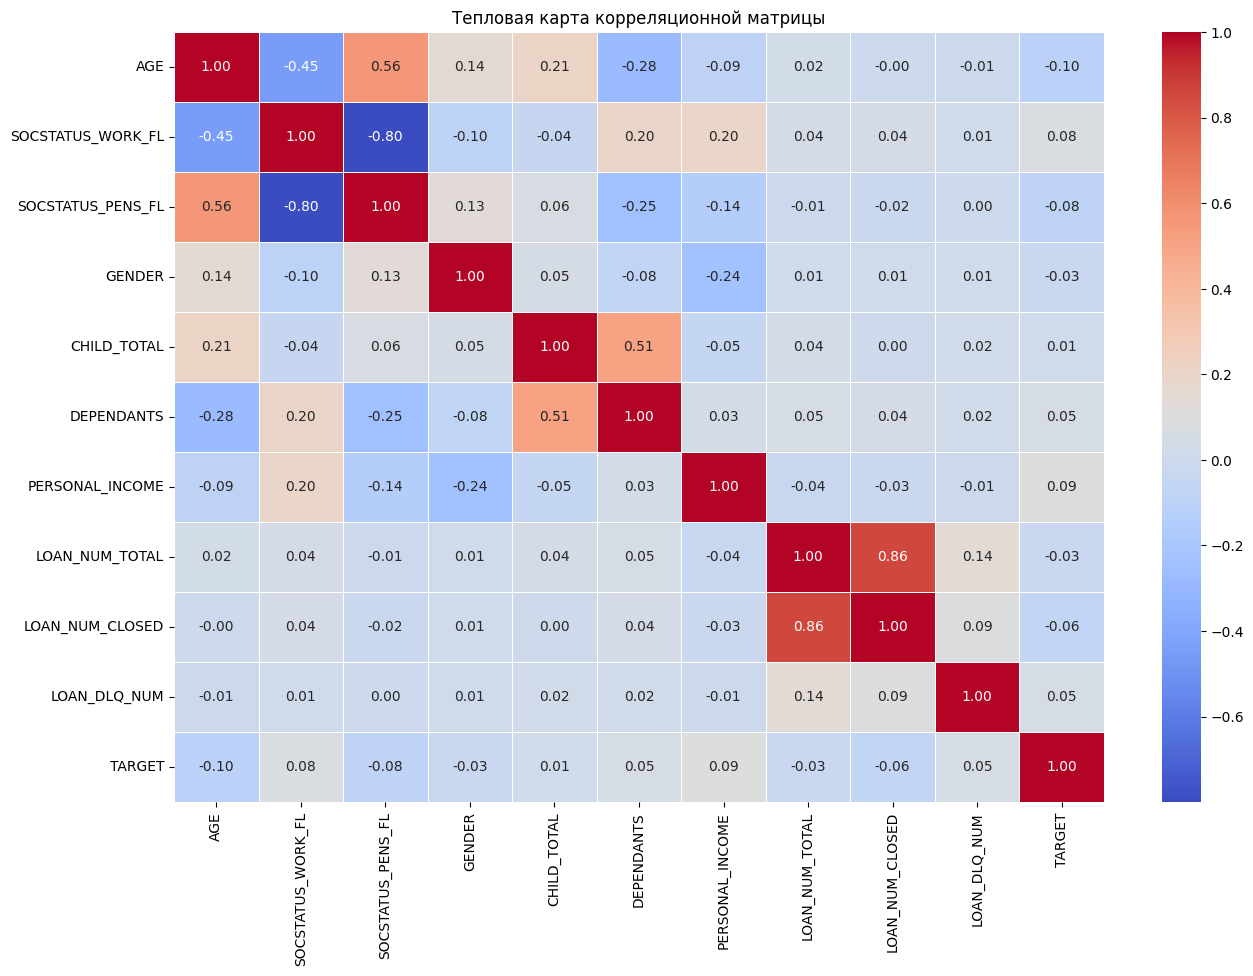

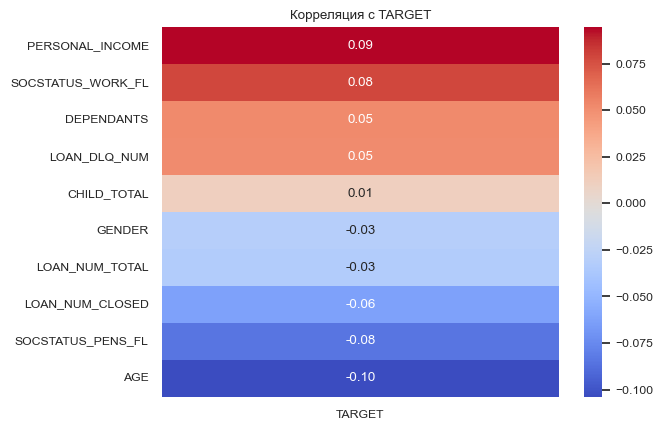

In [8]:
# Вычисляем корреляционную матрицу для обработанного DataFrame
correlation_matrix = df.corr()

# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = df.corr()
target_corr = corr['TARGET'].drop('TARGET')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с TARGET')
plt.show()

In [9]:
# Определение независимых и зависимых переменных
X = df.drop(["TARGET"], axis=1) # Независимые переменные
y = df['TARGET']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)


Размер обучающего набора: (12178, 10)
Размер тестового набора: (3045, 10)


In [10]:
# Построение модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Предсказание цен на тестовой выборке
y_test_pred = model.predict(X_test)

# Округление предсказанных значений до ближайшего целого числа
y_pred = [1 if value >= 0.5 else 0 for value in y_test_pred]

# Расчет метрик качества для бинарной классификации
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_pred)

# Оценка точности предсказаний
print('MAE на тестовой выборке:', mae_test)
print('MSE на тестовой выборке:', mse_test)
print('R2 на тестовой выборке:', r2_test)
print('Точность на тестовой выборке:', accuracy)

MAE на тестовой выборке: 0.20521443995428926
MSE на тестовой выборке: 0.10319074445013861
R2 на тестовой выборке: 0.031046659546975275
Точность на тестовой выборке: 0.8788177339901477


Не смотря на высокую точность предсказаний, модель линейной регресии для бинарной классификации может привести к не некоректным результатам.